In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2018,42.540001,43.075001,42.314999,43.064999,41.135754,102223600
1,1/3/2018,43.132500,43.637501,42.990002,43.057499,41.128586,118071600
2,1/4/2018,43.134998,43.367500,43.020000,43.257500,41.319633,89738400
3,1/5/2018,43.360001,43.842499,43.262501,43.750000,41.790070,94640000
4,1/8/2018,43.587502,43.902500,43.482498,43.587502,41.634850,82271200
...,...,...,...,...,...,...,...
1060,3/18/2022,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
1061,3/21/2022,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
1062,3/22/2022,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
1063,3/23/2022,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [4]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df1=df.reset_index()['Close'] 
df1

0        43.064999
1        43.057499
2        43.257500
3        43.750000
4        43.587502
           ...    
1060    163.979996
1061    165.380005
1062    168.820007
1063    170.210007
1064    174.070007
Name: Close, Length: 1065, dtype: float64

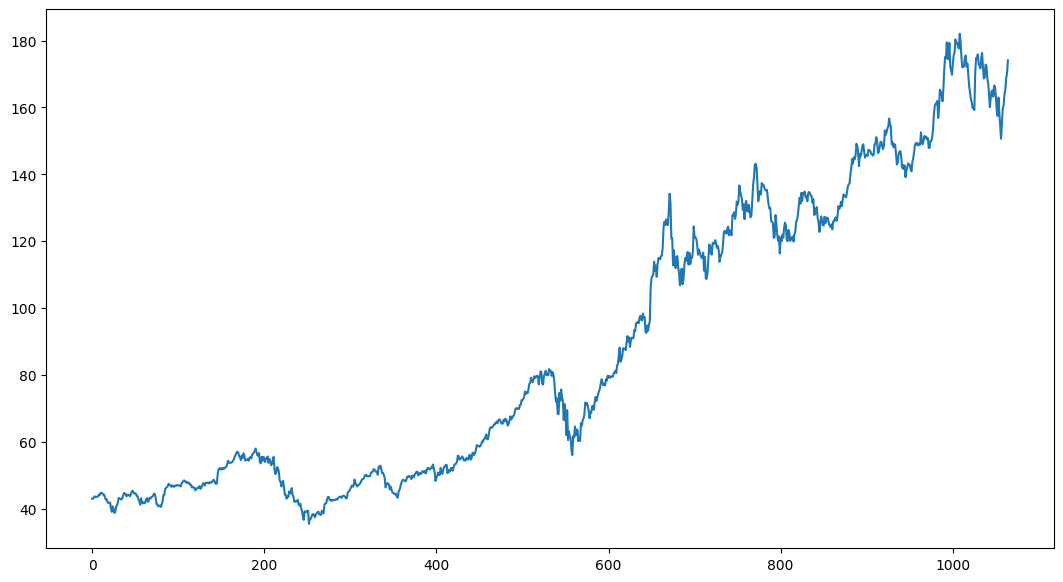

In [6]:
plt.figure(figsize=(13,7))
plt.plot(df1)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.9099429 ],
       [0.91943338],
       [0.94578825]])

In [10]:
#spliting data into train and test 
traingsize=int(len(df1)*.7)
testingsize=int(len(df1)-traingsize)
train_data,test_data=df1[0:traingsize:],df1[traingsize:len(df1):]
train_data.shape,test_data.shape, 


((745, 1), (320, 1))

In [11]:
#convert nunpy arry to dataset matriX
def create_dataset(dataset,time_step):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)    

In [12]:
timestamp=100
X_train,y_train=create_dataset(train_data,timestamp)
X_test,y_test=create_dataset(test_data,timestamp)

In [13]:
X_train.shape,X_test.shape

((644, 100), (219, 100))

In [14]:
y_test.shape,y_train.shape

((219,), (644,))

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [16]:
X_train

array([[[0.05132712],
        [0.05127591],
        [0.05264146],
        ...,
        [0.07676027],
        [0.07880857],
        [0.0784501 ]],

       [[0.05127591],
        [0.05264146],
        [0.05600409],
        ...,
        [0.07880857],
        [0.0784501 ],
        [0.07918409]],

       [[0.05264146],
        [0.05600409],
        [0.05489461],
        ...,
        [0.0784501 ],
        [0.07918409],
        [0.07802337]],

       ...,

       [[0.4195784 ],
        [0.42143894],
        [0.39120937],
        ...,
        [0.60221902],
        [0.60652044],
        [0.58876847]],

       [[0.42143894],
        [0.39120937],
        [0.38963898],
        ...,
        [0.60652044],
        [0.58876847],
        [0.59873688]],

       [[0.39120937],
        [0.38963898],
        [0.40462575],
        ...,
        [0.58876847],
        [0.59873688],
        [0.59306994]]])

In [17]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam
from keras.regularizers import l2

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Dropout(.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64)


Epoch 1/50
11/11 [==============================] - 6s 185ms/step - loss: 0.0269 - val_loss: 0.0018
Epoch 2/50
11/11 [==============================] - 1s 117ms/step - loss: 0.0047 - val_loss: 0.0166
Epoch 3/50
11/11 [==============================] - 1s 135ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 4/50
11/11 [==============================] - 2s 151ms/step - loss: 0.0013 - val_loss: 0.0140
Epoch 5/50
11/11 [==============================] - 2s 142ms/step - loss: 9.5808e-04 - val_loss: 0.0014
Epoch 6/50
11/11 [==============================] - 1s 124ms/step - loss: 7.8269e-04 - val_loss: 0.0013
Epoch 7/50
11/11 [==============================] - 2s 141ms/step - loss: 7.6547e-04 - val_loss: 0.0024
Epoch 8/50
11/11 [==============================] - 1s 119ms/step - loss: 7.6991e-04 - val_loss: 0.0016
Epoch 9/50
11/11 [==============================] - 1s 124ms/step - loss: 7.3278e-04 - val_loss: 0.0019
Epoch 10/50
11/11 [==============================] - 1s 125ms/step - loss: 6.831

In [57]:
import tensorflow as tf

In [58]:
###prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 32ms/step


In [59]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [60]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

71.64532132914427

In [61]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

149.38321693863608

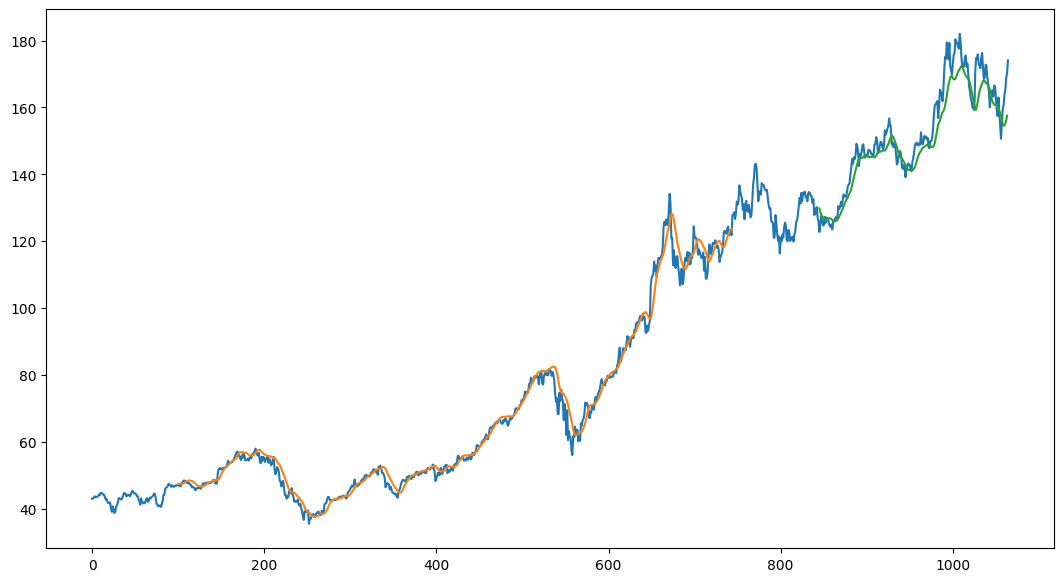

In [62]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(13,7))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
len(test_data)

320

In [64]:
320-100


220

In [65]:
x_input=test_data[220:].reshape(1,-1)
x_input.shape

(1, 100)

In [66]:
temp_input=list(x_input)
temp_input=x_input[0].tolist()

In [67]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

1/1 [==============================] - 0s 20ms/step
[0.8567579]
101
1 day input [0.78158237 0.79161907 0.78800041 0.79018522 0.78444998 0.7869762
 0.76724419 0.76690278 0.78137755 0.78144579 0.78827347 0.80527445
 0.83517965 0.8534779  0.85668692 0.85934972 0.86296838 0.82794232
 0.85136133 0.88590941 0.88229075 0.87539472 0.86228557 0.88604599
 0.92605614 0.95268418 0.94913376 0.98252114 0.95719047 0.94756342
 0.98149702 0.93343006 0.92578307 0.9162926  0.93841434 0.95650766
 0.96087738 0.98852953 0.98142868 0.98204325 0.97398653 0.96968515
 1.         0.98422806 0.95159172 0.93165489 0.93281558 0.93295217
 0.95268418 0.95575662 0.93295217 0.93896056 0.916634   0.89225911
 0.88051549 0.86617741 0.86078347 0.84822056 0.84760608 0.84439706
 0.92025267 0.95063585 0.94947516 0.95787318 0.93779977 0.93431768
 0.92933351 0.95097726 0.96087738 0.93247418 0.90871386 0.91035254
 0.93704872 0.93541014 0.91035254 0.89956479 0.87921831 0.85020064
 0.86843055 0.88283697 0.88468037 0.87157123 0.894

In [68]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [69]:
len(df1)

1065

In [70]:
df2=df1.tolist()
df2.extend(lst_output)

<Figure size 1300x700 with 0 Axes>

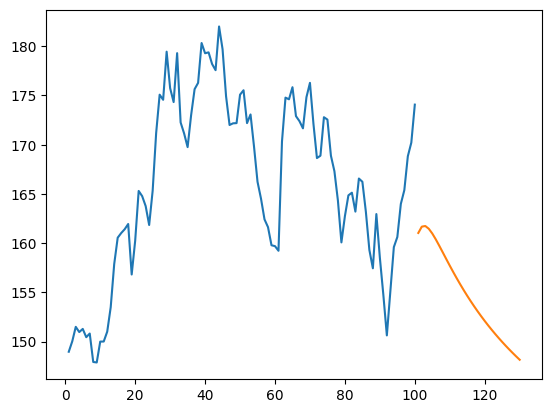

<Figure size 1300x700 with 0 Axes>

In [75]:
plt.plot(day_new,scaler.inverse_transform(df1[965:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

<Figure size 1300x700 with 0 Axes>

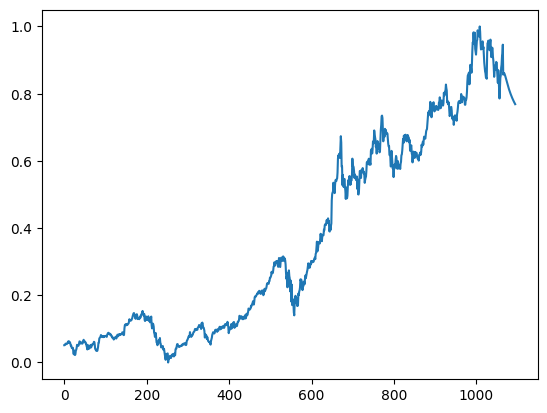

<Figure size 1300x700 with 0 Axes>

In [76]:
df2=df1.tolist()
df2.extend(lst_output)
plt.plot(df2)